# Laboratory 3: Linear Algebra 

>Angelene Leow, 23162167

## List of Problems

- [Problem One](#Problem-One): Pollution Box Model
- [Problem Two](#Problem-Two): Condition number for Dirichlet problem

In [1]:
import context
# import the quiz script
from numlabs.lab3 import quiz3
# import image handling
from IPython.display import Image
import numpy as np
from numpy import linalg as LA

******************************
context imported. Front of path:
/Users/angeleneleow/Dropbox/4th year- term2/atsc409/numeric_students
back of path: /Users/angeleneleow/.ipython
******************************

through /Users/angeleneleow/Dropbox/4th year- term2/atsc409/numeric_students/numeric_notebooks/lab3/context.py


#### Problem One

[lab3:sec2:carbon]:<#Problem-One>

Consider a very simple three box model of the movement of a pollutant in
the atmosphere, fresh-water and ocean. The mass of the atmosphere is MA
(5600 x 10$^{12}$ tonnes), the mass of the fresh-water is MF (360 x
10$^{12}$tonnes) and the mass of the upper layers of the ocean is MO
(50,000 x 10$^{12}$ tonnes). The amount of pollutant in the atmosphere
is A, the amount in the fresh water is F and the amount in the ocean is
O.

The pollutant is going directly into the atmosphere at a rate P1 = 1000
tonnes/year and into th efresh-water system at a rate P2 = 2000
tonnes/year. The pollutant diffuses between the atmosphere and ocean at
a rate depending linearly on the difference in concentration with a
diffusion constant L1 = 200 tonnes/year. The diffusion between the
fresh-water system and the atmosphere is faster as the fresh water is
shallower, L2 = 500 tonnes/year. The fresh-water system empties into the
ocean at the rate of Q = 36 x 10$^{12}$ tonnes/year. Lastly the
pollutant decays (like radioactivity) at a rate L3 = 0.05 /year.

See the graphical presentation of the cycle described above in
Figure [Box Model](#Figure-Box-Model) Schematic for Problem 1.

-   a\) Consider the steady state. There is no change in A, O, or F. Write
    down the three linear governing equations. Write the equations as an
    augmented matrix. Use Octave to find the solution.

-   b\) Show mathematically that there is no solution to this problem with L3
    = 0. Why, physically, is there no solution?

-   c\) Show mathematically that there is an infinite number of solutions if
    L3 = 0 and P1 = P2 = 0. Why, physically?

-   d\) For part c) above, what needs to be specified in order to determine a
    single physical solution. How would you put this in the matrix equation.

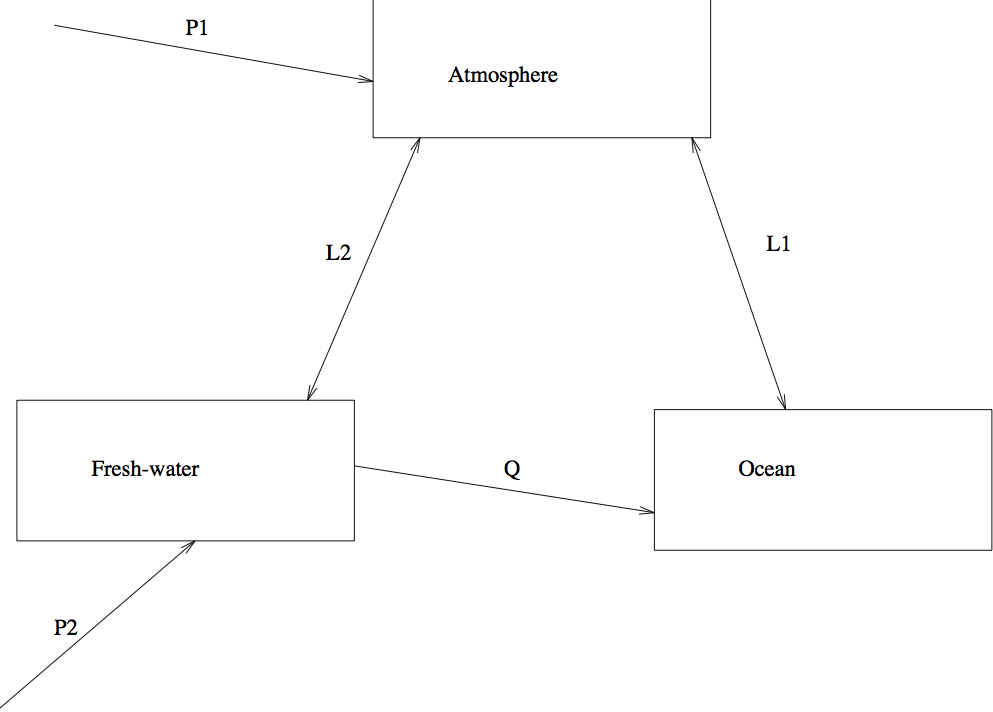

In [2]:
Image(filename='images/C_cycle_problem.png', width='40%')

#### Answer to 1(a):

Equation to three isolated systems:

>(1)$\dfrac{dA}{dt} = P_1+L_1(\dfrac{O}{M_o}-\dfrac{A}{M_A})+L_2(\dfrac{F}{M_F}-\dfrac{A}{M_A})-L_3A$

>(2)$\dfrac{dO}{dt}= Q \cdot \dfrac{F}{MF}+L_1(\dfrac{A}{MA}-\dfrac{O}{M_o})-L_3O$

>(3)$\dfrac{dF}{dt} = P_2-Q \cdot \dfrac{F}{MF}+L_2(\dfrac{A}{MA}-\dfrac{F}{MF})-L_3F$ 


Since $\frac{dF}{dt},\frac{dA}{dt},\frac{dO}{dt} =0$ at steady state, the equations become:

>(1)$-P_1 = \dfrac{L_1}{M_o} \cdot O -(\dfrac{L_1}{M_A}+\dfrac{L_2}{M_A}+L_3)\cdot A+\dfrac{L_2}{M_F}\cdot F$

>(2) $0 = -(\dfrac{L_1}{M_o}+L_3) \cdot O + \dfrac{L_1}{M_A}\cdot A + \dfrac{Q}{M_F} \cdot F$

>(3)$-P_2 = 0 + \dfrac{L_2}{M_A} \cdot A -(\dfrac{Q}{M_F}+\dfrac{L_2}{M_F}+L_3) \cdot F$ 
Rearraging to an augmented matrix:

 $ \begin{array}{cccc}
         & O & A & F &  \\
   \left[ \begin{array}{c} \\  \\  \\ \end{array} \right. 
   & \begin{array}{c} \frac{L_1}{MO} \\ -(\frac{L1}{MO}+L_3) \\0 \end{array} 
   & \begin{array}{c}   \frac{-(L_1+L2)}{MA}-L_3 \\ \frac{L_1}{MA} \\ \frac{L_2}{MA}       \end{array}
   & \begin{array}{c}   \frac{L2}{MF}  \\ \frac{Q}{MF}    \\ -\frac{(L_2+Q)}{MF}-L_3 \end{array} 
   & \left|  \begin{array}{c}   -P_1 \\ 0 \\ -P_2  \end{array} \right]
   \end{array}
 $

In [3]:
ma = 5600*10^12 #mass of atm
mf = 360*10^12  #mass of fresh water
mo = 50000*10^12 #mass of upper ocean layer
P1 = 1000 
P2 = 2000
L1 = 200
L2 = 500
L3 = 0.05
q= 36*10^12 #water per year, s^(-1)

mat1 = np.array (([L1/mo,-(L1+L2)/ma-L3,L2/mf],
                [-L1/mo-L3,(L1/ma),q/mf],
                [0,L2/ma,-(L2+q)/mf-L3]))
mat2 = ([-P1],[0],[-P2])
mat_solve = np.linalg.solve(mat1,mat2)
mat_solve
print('Solution to steady state matrix =' +str(mat_solve))

Solution to steady state matrix =[[18090.19661292]
 [33886.82820139]
 [ 8022.97518568]]


##### Answer to1(b):  

In [4]:
ma = 5600*10^12 #mass of atm
mf = 360*10^12  #mass of fresh water
mo = 50000*10^12 #mass of upper ocean layer
P1 = 1000 
P2 = 2000
L1 = 200
L2 = 500
L3 = 0
q= 36*10^12 #water per year, s^(-1)

mat1 = np.array (([L1/mo,-(L1+L2)/ma-L3,L2/mf],
                [-L1/mo-L3,(L1/ma),q/mf],
                [0,L2/ma,-(L2+q)/mf-L3]))
mat2 = ([-P1],[0],[-P2])
mat_solve = np.linalg.solve(mat1,mat2)
mat_solve
print('Solution to steady state matrix =' +str(mat_solve))

Solution to steady state matrix =[[-2.08995978e+22]
 [-1.14780498e+21]
 [-4.32345564e+19]]


> for $L_3 = 0$
> $$  \begin{array}{cccc}
         & O & A & F &  \\
   \left[ \begin{array}{c} \\  \\  \\ \end{array} \right. 
   & \begin{array}{c} \frac{L_1}{MO} \\ -\frac{L1}{MO} \\0 \end{array} 
   & \begin{array}{c}   \frac{-(L_1+L_2)}{MA} \\ \frac{L_1}{MA} \\ \frac{L_2}{MA}       \end{array}
   & \begin{array}{c}   \frac{L_2}{MF}  \\ \frac{Q}{MF}    \\ -\frac{(L_2+Q)}{MF} \end{array} 
   & \left|  \begin{array}{c}   -P_1 \\ 0 \\ -P_2  \end{array} \right]
   \end{array}
 $$

>$$\begin{array}{cl}
   \begin{array}{c}     \\
                      E_{i2}+E_{i3} \rightarrow \\
                         \end{array}
 & \begin{array}{rrrr}
    \left[ \begin{array}{r} \\  \\  \\ \end{array} \right. 
   & \begin{array}{r} \frac{L_1}{MO} \\ -\frac{L_1}{MO} \\0 \end{array} 
   & \begin{array}{r}   \frac{-(L_1+L_2)}{MA} \\ \frac{L_1+L_2}{MA} \\ \frac{L_2}{MA}       \end{array}
   & \begin{array}{r}   \frac{L_2}{MF}  \\ \frac{-L_2}{MF}    \\ -\frac{(L_2+Q)}{MF} \end{array} 
   & \left|  \begin{array}{c}   -P_1 \\ -P_2 \\ -P_2  \end{array} \right]
   \end{array} \\ \\
   \begin{array}{c}   E_{i2}-E_{i1} \rightarrow \\
                         \end{array} 
 &\begin{array}{rrrr}
    \left[ \begin{array}{r} \\  \\  \\ \end{array} \right. 
   & \begin{array}{r} 0 \\ -\frac{L_1}{MO} \\0 \end{array} 
   & \begin{array}{r}   0 \\ \frac{L_1}{MA} \\ \frac{L_2}{MA}       \end{array}
   & \begin{array}{r}   0  \\ \frac{Q}{MF}    \\ -\frac{(L_2+Q)}{MF} \end{array} 
   & \left|  \begin{array}{c}   -P_2-P_1 \\ -P_2 \\ -P_2  \end{array} \right]
   \end{array} \\ \\
\end{array}$$

>Based on $E_{i1}$, we can see that $0 = -(P_2+P_1)$, which is impossible, therefore there is no possible solution. Determinant of tha matrix is 0 which shows no possible solution as well.
Physically we know that a balanced steady state equation must have inputs and outputs to balance out. If L3 is removed from all three equations, there is a possiblity that $\frac{dO}{dt}, \frac{dA}{dt}, \frac{dF}{dt} \geq 0$ , which gives $\frac{dS}{dt} \geq 0$ if $\frac{dS}{dt}= \frac{dO}{dt} +\frac{dA}{dt}+\frac{dF}{dt} $.

##### Answer to 1(c):  $P_1=0, P_2=0, L3=0$

 $$  \begin{array}{cccc}
         & O & A & F &  \\
   \left[ \begin{array}{c} \\  \\  \\ \end{array} \right. 
   & \begin{array}{c} \frac{L_1}{MO} \\ -\frac{L_1}{MO} \\0 \end{array} 
   & \begin{array}{c}   \frac{-(L_1+L2)}{MA} \\ \frac{L_1}{MA} \\ \frac{L_2}{MA}       \end{array}
   & \begin{array}{c}   \frac{L2}{MF}  \\ \frac{Q}{MF}    \\ -\frac{(L_2+Q)}{MF} \end{array} 
   & \left|  \begin{array}{c}   0 \\ 0 \\ 0  \end{array} \right]
   \end{array}
 $$

$$\begin{array}{cl}
   \begin{array}{c}     \\
                      E_{i2}+E_{i3} \rightarrow \\
                         \end{array}
 & \begin{array}{rrrr}
    \left[ \begin{array}{r} \\  \\  \\ \end{array} \right. 
   & \begin{array}{r} \frac{L_1}{MO} \\ -\frac{L1}{MO} \\0 \end{array} 
   & \begin{array}{r}   \frac{-(L_1+L_2)}{MA} \\ \frac{L_1+L_2}{MA} \\ \frac{L_2}{MA}       \end{array}
   & \begin{array}{r}   \frac{L2}{MF}  \\ \frac{-L_2}{MF}    \\ -\frac{(L_2+Q)}{MF} \end{array} 
   & \left|  \begin{array}{c}   0 \\ 0 \\ 0  \end{array} \right]
   \end{array} \\ \\
   \begin{array}{c}   E_{i2}-E_{i1} \rightarrow \\
                         \end{array} 
 &\begin{array}{rrrr}
    \left[ \begin{array}{r} \\  \\  \\ \end{array} \right. 
   & \begin{array}{r} 0 \\ -\frac{L_1}{MO} \\0 \end{array} 
   & \begin{array}{r}   0 \\ \frac{L_1}{MA} \\ \frac{L_2}{MA}       \end{array}
   & \begin{array}{r}   0  \\ \frac{Q}{MF}    \\ -\frac{(L_2+Q)}{MF} \end{array} 
   & \left|  \begin{array}{c}   0 \\ 0 \\ 0  \end{array} \right]
   \end{array} \\ \\
   \begin{array}{c}   E_{i1} \leftrightarrow E_{i2}  \\ E_{i2} \leftrightarrow E_{i3}  \\
                         \end{array} 
 &\begin{array}{rrrr}
    \left[ \begin{array}{r} \\  \\  \\ \end{array} \right. 
   & \begin{array}{r}  \frac{L_1}{MO} \\0 \\0 \end{array} 
   & \begin{array}{r}    \frac{-L_1}{MA} \\   \frac{L_2}{MA}  \\0    \end{array}
   & \begin{array}{r}    \frac{Q}{MF}    \\ -\frac{(L_2+Q)}{MF} \\0 \end{array} 
   & \left|  \begin{array}{c} 0 \\ 0 \\ 0  \end{array} \right]
   \end{array} \\ \\
\end{array}$$

>  Mathematically, We know that A depends on F, O depends on A and F. Hence F can be any arbituary value to satisfy A and O. There are many infinite solutions.
Physically, if our main source of pollutant input (P1,P2)  and output (L3) are zero. $\dfrac{dS}{dt}=0 $. There are many ways (alternating directions of flow) for L1,L2  to retain total equilibrium for A,O and F in a steady state. 

##### Answer to 1(d): 
> We would need to specify a value for one of the variables A/O/F to get a unique solution. I set A = 5000
>To determine a particular solution, the number of initial conditions must match the number of constants in the general solution.
> If we can reduce the matrix into echelon form, we can find a unique set of solutions for O,A and F.


 $$  \begin{array}{cccc}
         & O & A & F &  \\
   \left[ \begin{array}{c} \\  \\  \\ \end{array} \right. 
   & \begin{array}{c} \frac{L_1}{MO} \\ -\frac{L_1}{MO} \\0 \\ 0\end{array} 
   & \begin{array}{c}   \frac{-(L_1+L2)}{MA} \\ \frac{L_1}{MA} \\ \frac{L_2}{MA} \\ 1      \end{array}
   & \begin{array}{c}   \frac{L2}{MF}  \\ \frac{Q}{MF}    \\ -\frac{(L_2+Q)}{MF}  \\ 0\end{array} 
   & \left|  \begin{array}{c}   0 \\ 0 \\ 0 \\ 5000 \end{array} \right]
   \end{array}
 $$

#### Problem Two
[lab3:prob:dirichlet]:<#Problem-Two> 

> a) Using Python, compute the condition number for
the matrix $A_1$ from Equation [Differential System Matrix](#lab3:eq:dir-system) for several values of $N$
between 5 and 50. ( **Hint:** This will be much easier if you write a
small Python function that outputs the matrix $A$ for a given value of
$N$.)

> c\) Another way to write the system of equations is to substitute the
boundary conditions into the equations, and thereby reduce size of the
problem to one of $N-1$ equations in $N-1$ unknowns. The corresponding
matrix is simply the $N-1$ by $N-1$ submatrix of $A_1$
from Equation [Differential System Matrix](#lab3:eq:dir-system) $$A_2 = \left[
      \begin{array}{ccccccc}
        -2 &  1 &  0 & \dots & && 0 \\
        1 & -2 &  1 & 0 & \dots & & \\
        0 & 1  & -2 & 1 & 0 & \dots &  \\
        & & & & & & \\
        \vdots & & \ddots & \ddots& \ddots & \ddots & \vdots\\
        & & & & & & 0 \\
        & & \dots & 0 & 1 & -2 & 1 \\
        0&  & &\dots & 0 & 1 & -2 \\
      \end{array}
    \right]
$$ Does this change in the matrix make a significant difference in the
condition number?

#### Answer 2
> a) $$A_1(N=5) = \left[
      \begin{array}{ccccc}
        1 & 0 &  0 & 0 & 0 \\
        1 & -2 &  1 & 0 & 0 \\
        0 & 1  & -2 & 1 & 0 \\
        0 & 0 & 1 & -2 & 1 \\
        0 & 0 & 0 & 0 & 1 \\
      \end{array}
    \right] $$
>

In [5]:
a1 = np.array([[1,0,0,0,0,],[1,-2,1,0,0],[0,1,-2,1,0],[0,0,1,-2,1],[0,0,0,0,1]])
cond_mat = LA.cond(a1)
print('Condition number for matrix A1 of dim = 5 is ' +str(cond_mat))

Condition number for matrix A1 of dim = 5 is 7.643905814828506


In [6]:
mat2_a = np.arange(5,51,9)
def condMat(num):
    # initialize matrix of NxN dimension
    y = np.zeros((num,num))
    
    #Set first and last rows of A
    y[0][0] =1
    y[num-1][num-1] = 1
    
    #variable 'set' represents numerator of the discrete differential equation
    set = [1,-2,1]
    
    for ii in range (1,num-1):
        y[ii][ii-1:ii+2] = set
    
    cond_Num = LA.cond(y)
        
    return y, print ('Condition number ='  +str(cond_Num))

In [7]:
for k in range(5,50):
    condMat(k)

Condition number =7.643905814828506
Condition number =10.99460031976541
Condition number =15.23311898662832
Condition number =20.336526151680207
Condition number =26.287086421268775
Condition number =33.07381141107933
Condition number =40.689754983885095
Condition number =49.13030203691636
Condition number =58.3922524542119
Condition number =68.4733105887401
Condition number =79.37178441258116
Condition number =91.0863987713163
Condition number =103.61617450397355
Condition number =116.96034750138841
Condition number =131.11831298322528
Condition number =146.08958623336363
Condition number =161.8737743750406
Condition number =178.47055572507102
Condition number =195.87966445685493
Condition number =214.1008790481355
Condition number =233.13401346970113
Condition number =252.9789103874517
Condition number =273.6354358625691
Condition number =295.1034751794937
Condition number =317.382929532326
Condition number =340.473713371065
Condition number =364.37575225987496
Condition number =389.

In [8]:
def condMat_2c(num):
    # initialize matrix of NxN dimension
    y = np.zeros((num-2,num))
 
    #variable 'set' represents numerator of the discrete differential equation
    set = [1,-2,1]
    
    for ii in range (1,num-1):
        y[ii-1][ii-1:ii+2] = set
    
    cond_Num = LA.cond(y)
        
    return y, print ('Condition number ='  +str(cond_Num))

In [9]:
for k in range(5,50):
    condMat_2c(k)

Condition number =3.8513089787162467
Condition number =5.825277025492654
Condition number =8.156549261596734
Condition number =10.844526950775833
Condition number =13.889217174231582
Condition number =17.290724725880786
Condition number =21.049170656472597
Condition number =25.164662643342684
Condition number =29.637290247630435
Condition number =34.46712614280755
Condition number =39.654228916984174
Condition number =45.198645854369495
Condition number =51.10041529517547
Condition number =57.35956852413344
Condition number =63.976131247565895
Condition number =70.95012473943252
Condition number =78.2815667299341
Condition number =85.97047209665399
Condition number =94.01685340484728
Condition number =102.42072133240572
Condition number =111.1820850063142
Condition number =120.30095227084863
Condition number =129.77732990278489
Condition number =139.61122378525133
Condition number =149.8026390490395
Condition number =160.3515801882034
Condition number =171.25805115516323
Condition numb

#### Answer 2(c),
> We observe that by reducing the dimension to $N-1$, the condition number is reduced **significantly**. $A_1$ is a well conditioned matrix. 